LSTMs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [2]:
data = pd.read_csv('srilanka.csv')
data['Date_reported'] = pd.to_datetime(data['Date_reported'])
data.set_index('Date_reported', inplace=True)

# Select the columns for prediction
new_cases_data = data['New_cases'].values.reshape(-1, 1)
new_deaths_data = data['New_deaths'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
new_cases_scaled = scaler.fit_transform(new_cases_data)
new_deaths_scaled = scaler.fit_transform(new_deaths_data)


In [3]:
train_size = int(len(new_cases_scaled) * 0.8)
train_cases = new_cases_scaled[:train_size]
train_deaths = new_deaths_scaled[:train_size]
test_cases = new_cases_scaled[train_size:]
test_deaths = new_deaths_scaled[train_size:]


In [4]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_cases.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))


In [5]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_cases, train_cases, epochs=100, batch_size=32)


Epoch 1/100
32/32 [==============================] - 6s 5ms/step - loss: 0.0124
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0093
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 7.8527e-05
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 3.2472e-05
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 2.8287e-05
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 2.3147e-05
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 1.9670e-05
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 1.6301e-05
Epoch 11/100
32/32 [==============================] - 0s 5ms/step - loss: 1.3361e-05
Epoch 12/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1005e-05
Epoch

In [6]:
cases_predictions = model.predict(test_cases)
deaths_predictions = model.predict(test_deaths)

# Inverse scale the predictions
cases_predictions = scaler.inverse_transform(cases_predictions)
deaths_predictions = scaler.inverse_transform(deaths_predictions)


8/8 [==============================] - 0s 4ms/step


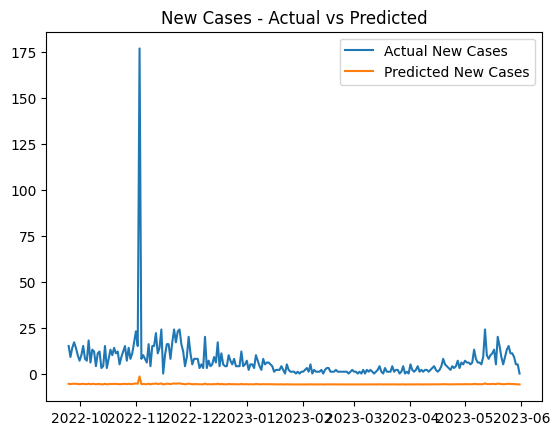

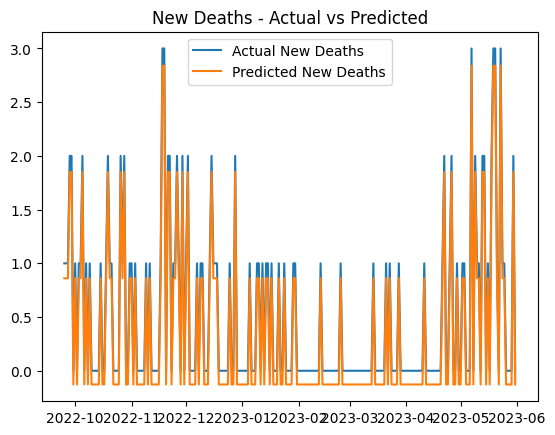

In [7]:
plt.plot(data.index[train_size:], new_cases_data[train_size:], label='Actual New Cases')
plt.plot(data.index[train_size:], cases_predictions, label='Predicted New Cases')
plt.title('New Cases - Actual vs Predicted')
plt.legend()
plt.show()

plt.plot(data.index[train_size:], new_deaths_data[train_size:], label='Actual New Deaths')
plt.plot(data.index[train_size:], deaths_predictions, label='Predicted New Deaths')
plt.title('New Deaths - Actual vs Predicted')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate the evaluation metrics for new cases
mse_cases = mean_squared_error(new_cases_data[train_size:], cases_predictions)
rmse_cases = np.sqrt(mse_cases)
mae_cases = mean_absolute_error(new_cases_data[train_size:], cases_predictions)

# Calculate the evaluation metrics for new deaths
mse_deaths = mean_squared_error(new_deaths_data[train_size:], deaths_predictions)
rmse_deaths = np.sqrt(mse_deaths)
mae_deaths = mean_absolute_error(new_deaths_data[train_size:], deaths_predictions)

print("New Cases - Evaluation Metrics:")
print("MSE:", mse_cases)
print("RMSE:", rmse_cases)
print("MAE:", mae_cases)
print()

print("New Deaths - Evaluation Metrics:")
print("MSE:", mse_deaths)
print("RMSE:", rmse_deaths)
print("MAE:", mae_deaths)


RNNs

Epoch 1/100
31/31 [==============================] - 8s 14ms/step - loss: 0.0051
Epoch 2/100
31/31 [==============================] - 0s 13ms/step - loss: 0.0022
Epoch 3/100
31/31 [==============================] - 0s 13ms/step - loss: 0.0020
Epoch 4/100
31/31 [==============================] - 0s 13ms/step - loss: 0.0021
Epoch 5/100
31/31 [==============================] - 0s 13ms/step - loss: 0.0020
Epoch 6/100
31/31 [==============================] - 0s 13ms/step - loss: 0.0021
Epoch 7/100
31/31 [==============================] - 0s 13ms/step - loss: 0.0021
Epoch 8/100
31/31 [==============================] - 0s 12ms/step - loss: 0.0020
Epoch 9/100
31/31 [==============================] - 0s 14ms/step - loss: 0.0021
Epoch 10/100
31/31 [==============================] - 0s 15ms/step - loss: 0.0021
Epoch 11/100
31/31 [==============================] - 0s 14ms/step - loss: 0.0020
Epoch 12/100
31/31 [==============================] - 1s 23ms/step - loss: 0.0019
Epoch 13/100
31/31 [=====

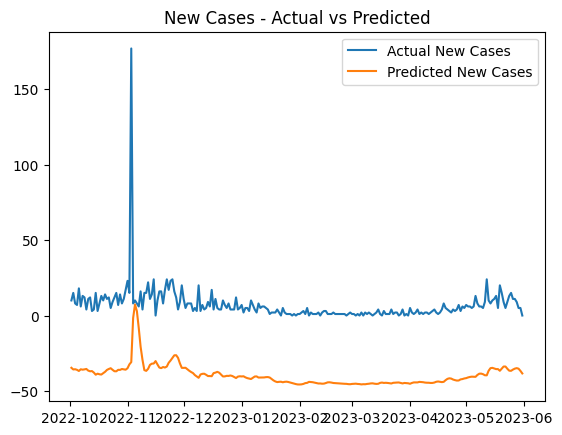

New Cases - Evaluation Metrics:
MSE: 2302.0840813311574
RMSE: 47.98003836316888
MAE: 46.402606267574406


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error


# Load and preprocess the data
data = pd.read_csv('srilanka.csv')
data['Date_reported'] = pd.to_datetime(data['Date_reported'])
data.set_index('Date_reported', inplace=True)
new_cases_data = data['New_cases'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
new_cases_scaled = scaler.fit_transform(new_cases_data)

# Split the data into training and testing sets
train_size = int(len(new_cases_scaled) * 0.8)
train_cases = new_cases_scaled[:train_size]
test_cases = new_cases_scaled[train_size:]

# Prepare the data for LSTM
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 7  # Number of time steps to consider for each prediction

train_X, train_y = prepare_data(train_cases, n_steps)
test_X, test_y = prepare_data(test_cases, n_steps)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=100, batch_size=32)

# Make predictions on the test data
cases_predictions = model.predict(test_X)

# Inverse scale the predictions
cases_predictions = scaler.inverse_transform(cases_predictions)

# Visualize the results
plt.plot(data.index[train_size+n_steps:], new_cases_data[train_size+n_steps:], label='Actual New Cases')
plt.plot(data.index[train_size+n_steps:], cases_predictions, label='Predicted New Cases')
plt.title('New Cases - Actual vs Predicted')
plt.legend()
plt.show()

# Evaluate the model
mse_cases = mean_squared_error(new_cases_data[train_size+n_steps:], cases_predictions)
rmse_cases = np.sqrt(mse_cases)
mae_cases = mean_absolute_error(new_cases_data[train_size+n_steps:], cases_predictions)

print("New Cases - Evaluation Metrics:")
print("MSE:", mse_cases)
print("RMSE:", rmse_cases)
print("MAE:", mae_cases)


survival curve

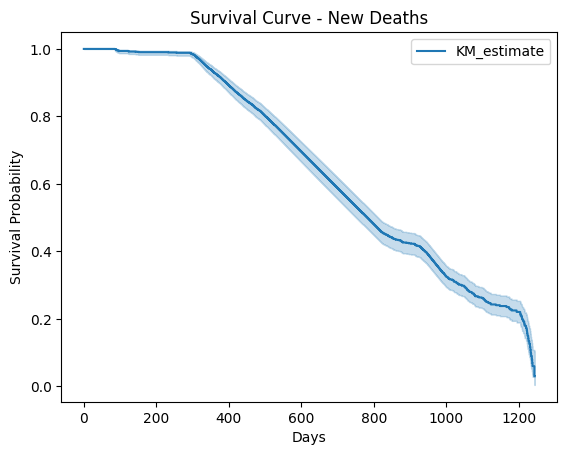

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Load and preprocess the data
data = pd.read_csv('srilanka.csv')
data['Date_reported'] = pd.to_datetime(data['Date_reported'])
data.set_index('Date_reported', inplace=True)

# Prepare the data for survival analysis
new_deaths_data = data['New_deaths'].values
survival_time = range(len(new_deaths_data))
event_occurred = new_deaths_data > 0

# Fit the Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(survival_time, event_observed=event_occurred)

# Plot the survival curve
kmf.plot()
plt.title('Survival Curve - New Deaths')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.show()


In [11]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 9.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=b1ee1b02c2af0d6eef9904c4088a8cf7965e448944bf31db4e8427c8eeb44891
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


SARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


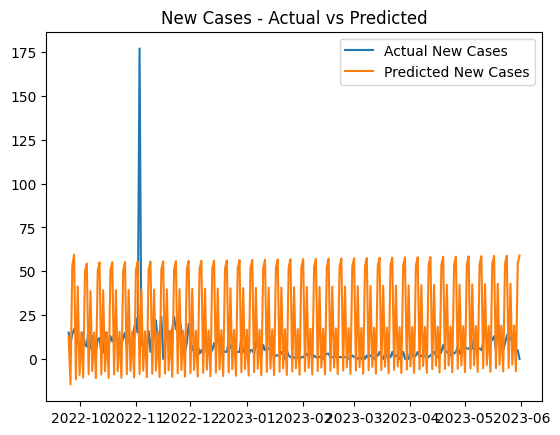

New Cases - Evaluation Metrics:
MSE: 1097.5081385540786
RMSE: 33.12866037970866
MAE: 26.61935887394851


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and preprocess the data
data = pd.read_csv('srilanka.csv')
data['Date_reported'] = pd.to_datetime(data['Date_reported'])
data.set_index('Date_reported', inplace=True)
new_cases_data = data['New_cases']

# Split the data into training and testing sets
train_size = int(len(new_cases_data) * 0.8)
train_cases = new_cases_data[:train_size]
test_cases = new_cases_data[train_size:]

# Fit the SARIMA model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 7)  # assuming weekly seasonality
model = SARIMAX(train_cases, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Make predictions on the test data
cases_predictions = model_fit.predict(start=test_cases.index[0], end=test_cases.index[-1])

# Visualize the results
plt.plot(data.index[train_size:], new_cases_data[train_size:], label='Actual New Cases')
plt.plot(cases_predictions.index, cases_predictions, label='Predicted New Cases')
plt.title('New Cases - Actual vs Predicted')
plt.legend()
plt.show()

# Evaluate the model
mse_cases = mean_squared_error(test_cases, cases_predictions)
rmse_cases = np.sqrt(mse_cases)
mae_cases = mean_absolute_error(test_cases, cases_predictions)

print("New Cases - Evaluation Metrics:")
print("MSE:", mse_cases)
print("RMSE:", rmse_cases)
print("MAE:", mae_cases)
